#**Stacking - XgBoost (Classification)**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier

**Code**

In [2]:
# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define base classifiers
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000)),
    ('svc', SVC(kernel='linear', probability=True)),  # Support Vector Classifier
    ('dt', DecisionTreeClassifier(max_depth=3)),    # Decision Tree Classifier
    ('knn', KNeighborsClassifier(n_neighbors=3)),     # K-Nearest Neighbors
    ('et', ExtraTreesClassifier(n_estimators=10, random_state=42))  # Extra Trees Classifier
]

In [5]:
# Create a stacking classifier with XGBoost as the final estimator
stacking_classifier = StackingClassifier(
    estimators=base_estimators,
    final_estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),  # Set eval_metric to avoid warning
    cv=5
)

In [6]:
# Fit the stacking classifier
stacking_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:44:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=10,
                                                           random_state=42)),
                               ('lr', LogisticRegression(max_iter=1000)),
                               ('svc', SVC(kernel='linear', probability=True)),
                               ('dt', DecisionTreeClassifier(max_depth=3)),
                               ('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('et',
                                Extr...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [7]:
# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacking Classifier: {accuracy:.2f}')

Accuracy of Stacking Classifier: 1.00


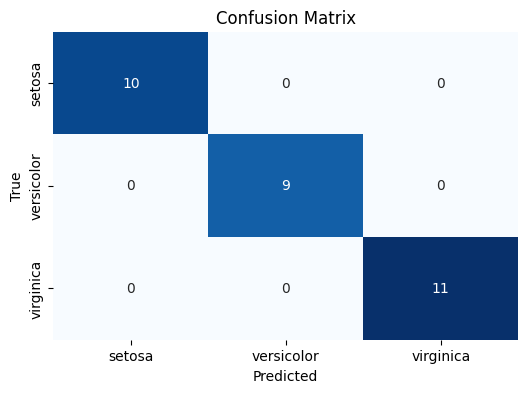

In [9]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=data.target_names,
                yticklabels=data.target_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, y_pred)